# Final Project: Fake News Detector

# Importing all the libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense,Bidirectional,LSTM
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import KFold


# Data Preprocessing

Ensure the dataset files are saved in same directory

In [3]:
df_fake = pd.read_csv('Fake.csv', nrows = 3000)
df_true = pd.read_csv('True.csv', nrows = 3000)

In [6]:
#creating a target varaiable for the datasets
df_fake["class"] = 0
df_true["class"] = 1

In [7]:
#merging the dataset
df_merge = pd.concat([df_fake, df_true], axis =0 )

In [8]:
#dropping unnecessary attribuites
df = df_merge.drop(["title", "subject","date"], axis = 1)

In [9]:
#shuffling the dataset
df = df.sample(frac = 1)

In [10]:
#reseting the index after the shuffeling
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)


In [11]:
#adding a column named as a splitting value having all data records 0
df["Splitting Value"] = 0


In [12]:
#assignining a random value between 0 to 1 to splitting value column
for i in range(len(df)):
    df.loc[i, "Splitting Value"] = np.random.uniform(0,1)


<ipython-input-12-a2dab8682159>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.6806876572958821' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[i, "Splitting Value"] = np.random.uniform(0,1)


In [13]:
#saving the dataframe as a csv file
df.to_csv('Fake_News_Detection_dataset.csv', index=False)

In [14]:
dataset = pd.read_csv('/content/Fake_News_Detection_dataset.csv')
dataset.head()

,text,class,Splitting Value
0,Donald Trump just got caught lying again and t...,0,0.680688
1,"Puerto Rico’s bankruptcy, aimed at restructuri...",1,0.299998
2,"As you may already know, Trump recently shocke...",0,0.889390
3,President Donald Trump will name David Kautter...,1,0.367255
4,The U.S. Justice Department on Friday asked th...,1,0.258430


# PreProcessing data for K-cross Validation

In [15]:
dataframe = dataset.drop(["Splitting Value"],axis=1)
dataframe.shape

(6000, 2)

In [16]:
Data_docs = dataframe['text'].astype(str).values
Data_labels = dataframe['class'].values

# Partitioning data into training, testing and validation

In [17]:
train_data = dataset[dataset['Splitting Value']<=0.7]
train_data=train_data.drop(['Splitting Value'],axis=1)
validate_data = dataset[(dataset['Splitting Value'] > 0.7) & (dataset['Splitting Value'] <= 0.9)]
validate_data=validate_data.drop(['Splitting Value'],axis=1)
test_data = dataset[dataset['Splitting Value'] > 0.9]
test_data=test_data.drop(['Splitting Value'],axis=1)


# CNN Model

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


259/259 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - acc: 0.6433 - loss: 0.5308 - val_acc: 0.9882 - val_loss: 0.0456
Epoch 2/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - acc: 0.9943 - loss: 0.0210 - val_acc: 0.9897 - val_loss: 0.0294
Epoch 3/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9974 - loss: 0.0068 - val_acc: 0.9897 - val_loss: 0.0248
Epoch 4/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9999 - loss: 0.0021 - val_acc: 0.9897 - val_loss: 0.0249
Epoch 5/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 1.0000 - loss: 8.1420e-04 - val_acc: 0.9921 - val_loss: 0.0284
Epoch 6/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 1.0000 - loss: 3.9873e-04 - val_acc: 0.9921 - val_loss: 0.0283
Epoch 7/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 1.0000 - loss: 2.1562e-04 - val_acc: 0.9921 - val_loss: 0.0277
Epoch 8/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 1.0000 - loss: 1.6573e-04 - val_acc: 0.9921 - val_loss: 0.0289
Epoch 9/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

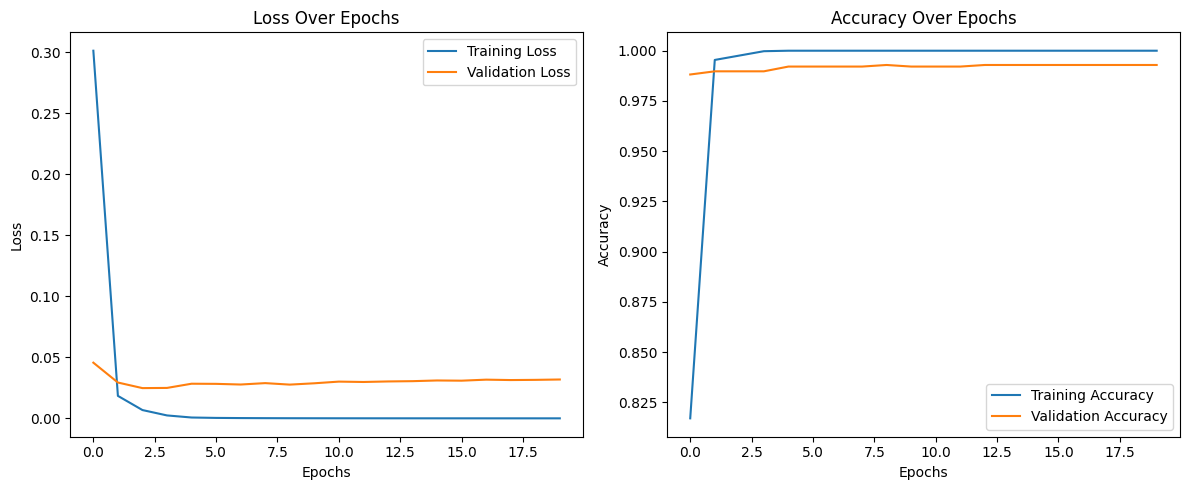

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.9988 - loss: 0.0133
Test Loss: 0.018517302349209785
Test Accuracy: 0.9983136653900146
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

Classification Report:
              precision    recall  f1-score   support

        Fake       1.00      1.00      1.00       304
        True       1.00      1.00      1.00       289

    accuracy                           1.00       593
   macro avg       1.00      1.00      1.00       593
weighted avg       1.00      1.00      1.00       593


Confusion Matrix:
[[303   1]
 [  0 289]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Article: The special counsel examining alleged Russian interference in the 2016 U.S. presidential election re...
Predicted Label: True
Actual Label: True

Article: Michigan Governor Rick Snyder denied Thursday that he had misled a U.S. House of Representatives com...
Predicted Label: True
Actual Label: True

Article: President Donald Trump said on Friday he would spend an extra day in the Phi

['True', 'True', 'True', 'True', 'Fake']

In [22]:
class FakeNewsClassifier:
    def __init__(self, vocab_size=10000, max_length=500):
        """
        Initializes the FakeNewsClassifier with given parameters.

        Parameters:
        vocab_size (int): Vocabulary size for one_hot encoding.
        max_length (int): Maximum sequence length for padding.
        """
        self.vocab_size = vocab_size
        self.max_length = max_length
        self.model = None
        self.history = None

    def preprocess_data(self, train_data, test_data, validate_data, text_column, label_column):
        """
        Prepares and preprocesses the dataset for training, testing, and validation.

        Parameters:
        train_data (DataFrame): Training dataset.
        test_data (DataFrame): test Dataset
        validate_data (DataFrame): Validation dataset.
        text_column (str): Column containing text data.
        label_column (str): Column containing labels.

        Returns:
        tuple: Preprocessed training, testing, and validation data.
        """
        # Extract text and labels
        train_docs = train_data[text_column].astype(str).values
        train_labels = train_data[label_column].values

        test_docs = test_data[text_column].astype(str).values
        test_labels = test_data[label_column].values

        validate_docs = validate_data[text_column].astype(str).values
        validate_labels = validate_data[label_column].values

        # One-hot encoding
        X_train = [one_hot(doc, self.vocab_size) for doc in train_docs]
        X_test = [one_hot(doc, self.vocab_size) for doc in test_docs]
        X_validate = [one_hot(doc, self.vocab_size) for doc in validate_docs]

        # Padding sequences
        X_train = pad_sequences(X_train, maxlen=self.max_length, padding='post')
        X_test = pad_sequences(X_test, maxlen=self.max_length, padding='post')
        X_validate = pad_sequences(X_validate, maxlen=self.max_length, padding='post')

        return (X_train, train_labels), (X_test, test_labels), (X_validate, validate_labels)

    def build_model(self):
        """
        Builds and compiles the classification model.
        """
        self.model = Sequential([
            Embedding(self.vocab_size, 8, input_length=self.max_length),
            Conv1D(128, 5, activation='relu'),
            GlobalMaxPooling1D(),
            Dense(10, activation='relu'),
            Dense(1, activation='sigmoid')
        ])
        self.model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

    def train_model(self, X_train, y_train, X_validate, validate_labels, epochs=20, batch_size=16):
        """
        Trains the model with the provided training data.

        Parameters:
        X_train (ndarray): Preprocessed training data.
        y_train (ndarray): Labels for training data.
        X_validate (ndarray): Preprocessed validating data.
        validate_label (ndarray): Labels for validating data.
        epochs (int): Number of training epochs.
        batch_size (int): Size of each training batch.
        """
        self.history = self.model.fit(X_train, y_train, epochs=epochs, validation_data=(X_validate, validate_labels), batch_size=batch_size)

    def evaluate_model(self, X_test, y_test):
        """
        Evaluates the model on the validation dataset.

        Parameters:
        X_validate(ndarray): Preprocessed validate data.
        validate_labels (ndarray): Labels for validation data.

        Returns:
        tuple:  loss and accuracy.
        """
        loss, accuracy = self.model.evaluate(X_test, y_test)
        print(f"Test Loss: {loss}")
        print(f"Test Accuracy: {accuracy}")

        # Generate classification report and confusion matrix
        predictions = (self.model.predict(X_test) >= 0.5).astype(int)
        print("\nClassification Report:")
        print(classification_report(y_test, predictions, target_names=['Fake', 'True']))

        print("\nConfusion Matrix:")
        cm = confusion_matrix(y_test, predictions)
        print(cm)

        return loss, accuracy, cm

    def plot_metrics(self):
        """
        Plots training and validation loss and accuracy.
        """
        if self.history is None:
            print("No training history found. Train the model first.")
            return

        # Plot Loss
        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        plt.plot(self.history.history['loss'], label='Training Loss')
        plt.plot(self.history.history['val_loss'], label='Validation Loss')
        plt.title('Loss Over Epochs')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        # Plot Accuracy
        plt.subplot(1, 2, 2)
        plt.plot(self.history.history['acc'], label='Training Accuracy')
        plt.plot(self.history.history['val_acc'], label='Validation Accuracy')
        plt.title('Accuracy Over Epochs')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.tight_layout()
        plt.show()

    def predict_new_articles(self, articles, actual_labels=None):
        """
        Predicts whether the provided articles are true or fake, showing both predictions and actual labels.

        Parameters:
        articles (list of str): List of articles to classify.
        actual_labels (list, optional): Actual labels corresponding to the articles.

        Returns:
        list: Predicted labels ("True" or "Fake").
        """
        # Preprocess the new articles
        encoded_articles = [one_hot(article, self.vocab_size) for article in articles]
        padded_articles = pad_sequences(encoded_articles, maxlen=self.max_length, padding='post')

        # Predict
        predictions = self.model.predict(padded_articles)
        predicted_labels = ["True" if pred >= 0.5 else "Fake" for pred in predictions]

        # Display predictions along with actual labels if provided
        for i, (article, predicted_label) in enumerate(zip(articles, predicted_labels)):
            actual_label = "Unknown" if actual_labels is None else ("True" if actual_labels[i] == 1 else "Fake")
            print(f"Article: {article[:100]}...")  # Print first 100 characters for readability
            print(f"Predicted Label: {predicted_label}")
            print(f"Actual Label: {actual_label}\n")

        return predicted_labels


# Example Usage:
# Assuming `train_data`, `test_data`, and `validate_data` are DataFrames with 'text' and 'class' columns
classifier = FakeNewsClassifier()



# Preprocess the dataset
(X_train, y_train), (X_test, y_test), (X_validate, y_validate) = classifier.preprocess_data(
    train_data, test_data, validate_data, text_column='text', label_column='class'
)

# Build the model
classifier.build_model()

# Train the model
classifier.train_model(X_train, y_train, X_validate, y_validate, epochs=20, batch_size=16)

#Plot the matricies
classifier.plot_metrics()

# Evaluate the model
classifier.evaluate_model(X_test, y_test)

# Predict new articles with actual labels
new_articles = test_data['text'].astype(str).values[:5]  # Example new articles
actual_labels = test_data['class'].values[:5]  # Corresponding actual labels
classifier.predict_new_articles(new_articles, actual_labels=actual_labels)

# CNN Model with K-Fold Cross validation

In [19]:
class KfoldCnnFakeNewsClassifier:
    def __init__(self, vocab_size=10000, max_length=500):
        """
        Initializes the FakeNewsClassifier with given parameters.

        Parameters:
        vocab_size (int): Vocabulary size for one_hot encoding.
        max_length (int): Maximum sequence length for padding.
        """
        self.vocab_size = vocab_size
        self.max_length = max_length
        self.model = None
        self.history = None


    def build_model(self):
        """
        Builds and compiles the classification model.
        """
        self.model = Sequential([
            Embedding(self.vocab_size, 8, input_length=self.max_length),
            Conv1D(128, 5, activation='relu'),
            GlobalMaxPooling1D(),
            Dense(10, activation='relu'),
            Dense(1, activation='sigmoid')
        ])
        self.model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])


    def evaluate_model(self, X_test, y_test):
        """
        Evaluates the model on the test dataset.

        Parameters:
        X_test (ndarray): Preprocessed testing data.
        y_test (ndarray): Labels for testing data.

        Returns:
        tuple: Test loss and accuracy.
        """
        loss, accuracy = self.model.evaluate(X_test, y_test)
        print(f"Test Loss: {loss}")
        print(f"Test Accuracy: {accuracy}")

        # Generate classification report and confusion matrix
        predictions = (self.model.predict(X_test) >= 0.5).astype(int)
        print("\nClassification Report:")
        print(classification_report(y_test, predictions, target_names=['Fake', 'True']))

        print("\nConfusion Matrix:")
        cm = confusion_matrix(y_test, predictions)
        print(cm)

        return loss, accuracy, cm

    def k_fold_cross_validation(self, data, text_column, label_column, k=5, epochs=20, batch_size=16):
        """
        Performs k-fold cross-validation on the dataset.

        Parameters:
        data (DataFrame): Dataset to be used for k-fold cross-validation.
        text_column (str): Column containing text data.
        label_column (str): Column containing labels.
        k (int): Number of folds for cross-validation.
        epochs (int): Number of training epochs.
        batch_size (int): Size of each training batch.
        """
        # Extract text and labels
        docs = data[text_column].astype(str).values
        labels = data[label_column].values

        # One-hot encoding and padding
        encoded_docs = [one_hot(doc, self.vocab_size) for doc in docs]
        padded_docs = pad_sequences(encoded_docs, maxlen=self.max_length, padding='post')

        # Initialize k-fold cross-validation
        kf = KFold(n_splits=k, shuffle=True, random_state=42)

        fold = 1
        all_losses = []
        all_accuracies = []

        for train_index, test_index in kf.split(padded_docs):
            print(f"Training fold {fold}/{k}...")

            # Split data
            X_train, X_test = padded_docs[train_index], padded_docs[test_index]
            y_train, y_test = labels[train_index], labels[test_index]

            # Build and train model
            self.build_model()
            history = self.model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), batch_size=batch_size, verbose=0)

            # Evaluate model
            loss, accuracy = self.model.evaluate(X_test, y_test, verbose=0)
            print(f"Fold {fold} - Loss: {loss}, Accuracy: {accuracy}")
            fold += 1

            # Store results
            all_losses.append(loss)
            all_accuracies.append(accuracy)

        # Average results
        avg_loss = np.mean(all_losses)
        avg_accuracy = np.mean(all_accuracies)
        print(f"\nAverage Loss: {avg_loss}")
        print(f"Average Accuracy: {avg_accuracy}")

        return avg_loss, avg_accuracy

# Example Usage:
# Assuming `train_data`, `test_data`, and `validate_data` are DataFrames with 'text' and 'class' columns
classifier = KfoldCnnFakeNewsClassifier(vocab_size=5000, max_length=100)

# Perform k-fold cross-validation
classifier.k_fold_cross_validation(dataframe, text_column='text', label_column='class', k=5, epochs=20, batch_size=16)



Training fold 1/5...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Fold 1 - Loss: 0.06113458052277565, Accuracy: 0.987500011920929
Training fold 2/5...
Fold 2 - Loss: 0.030402405187487602, Accuracy: 0.9916666746139526
Training fold 3/5...
Fold 3 - Loss: 0.04253219813108444, Accuracy: 0.9866666793823242
Training fold 4/5...
Fold 4 - Loss: 0.035027917474508286, Accuracy: 0.9916666746139526
Training fold 5/5...
Fold 5 - Loss: 0.07656897604465485, Accuracy: 0.9866666793823242

Average Loss: 0.049133215472102164
Average Accuracy: 0.9888333439826965


(0.049133215472102164, 0.9888333439826965)

# RNN Model

Epoch 1/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.7483 - loss: 0.8616 - val_accuracy: 0.9495 - val_loss: 0.1881
Epoch 2/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.9757 - loss: 0.1021 - val_accuracy: 0.9535 - val_loss: 0.3242
Epoch 3/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.9921 - loss: 0.0494 - val_accuracy: 0.9716 - val_loss: 0.2208
Epoch 4/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.9943 - loss: 0.0564 - val_accuracy: 0.9724 - val_loss: 0.1892
Epoch 5/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.9982 - loss: 0.0233 - val_accuracy: 0.9740 - val_loss: 0.1874
Epoch 6/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.9981 - loss: 0.0260 - val_accuracy: 0.9748 - val_loss: 0.1936
Epoch 7/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.9986 - loss: 0.0217 - val_accuracy: 0.9732 - val_loss: 0.1932
Epoch 8/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9987 - loss: 0.0202 - val_ac

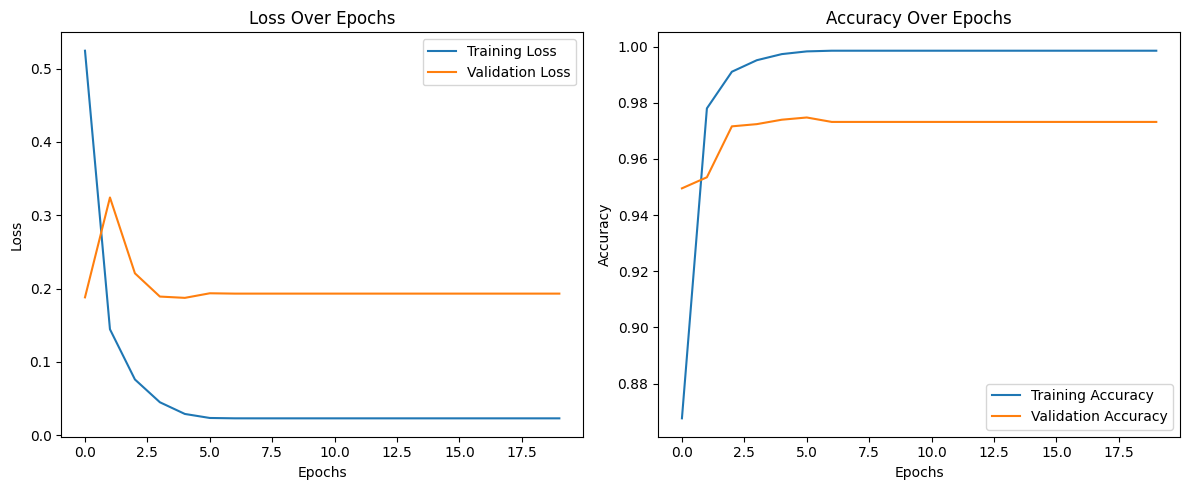

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9830 - loss: 0.1542
Test Loss: 0.13967899978160858
Test Accuracy: 0.9814502596855164
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step

Classification Report:
              precision    recall  f1-score   support

        Fake       0.98      0.98      0.98       304
        True       0.98      0.98      0.98       289

    accuracy                           0.98       593
   macro avg       0.98      0.98      0.98       593
weighted avg       0.98      0.98      0.98       593


Confusion Matrix:
[[298   6]
 [  5 284]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Article: The special counsel examining alleged Russian interference in the 2016 U.S. presidential election re...
Predicted Label: True
Actual Label: True

Article: Michigan Governor Rick Snyder denied Thursday that he had misled a U.S. House of Representatives com...
Predicted Label: True
Actual Label: True

Article: President Donald Trump said on Friday he would spend an extra day in th

['True', 'True', 'True', 'True', 'Fake']

In [23]:
class RNNFakeNewsClassifier:
    def __init__(self, vocab_size=10000, max_length=100):
        """
        Initializes the FakeNewsClassifier with given parameters.

        Parameters:
        vocab_size (int): Vocabulary size for one_hot encoding.
        max_length (int): Maximum sequence length for padding.
        """
        self.vocab_size = vocab_size
        self.max_length = max_length
        self.model = None
        self.history = None

    def preprocess_data(self, train_data, test_data, validate_data, text_column, label_column):
        """
        Prepares and preprocesses the dataset for training, testing, and validation.

        Parameters:
        train_data (DataFrame): Training dataset.
        test_data (DataFrame): Testing dataset.
        validate_data (DataFrame): Validation dataset.
        text_column (str): Column containing text data.
        label_column (str): Column containing labels.

        Returns:
        tuple: Preprocessed training, testing, and validation data.
        """
        # Extract text and labels
        train_docs = train_data[text_column].astype(str).values
        train_labels = train_data[label_column].values

        test_docs = test_data[text_column].astype(str).values
        test_labels = test_data[label_column].values

        validate_docs = validate_data[text_column].astype(str).values
        validate_labels = validate_data[label_column].values

        # One-hot encoding
        X_train = [one_hot(doc, self.vocab_size) for doc in train_docs]
        X_test = [one_hot(doc, self.vocab_size) for doc in test_docs]
        X_validate = [one_hot(doc, self.vocab_size) for doc in validate_docs]

        # Padding sequences
        X_train = pad_sequences(X_train, maxlen=self.max_length, padding='post')
        X_test = pad_sequences(X_test, maxlen=self.max_length, padding='post')
        X_validate = pad_sequences(X_validate, maxlen=self.max_length, padding='post')

        return (X_train, train_labels), (X_test, test_labels), (X_validate, validate_labels)

    def build_model(self):
        """
        Builds and compiles the RNN classification model.
        """
        self.model = Sequential([
            Embedding(self.vocab_size, 64, mask_zero=True),
            Bidirectional(LSTM(64, return_sequences=True)),
            Bidirectional(LSTM(32)),
            Dense(64, activation='relu'),
            Dense(1)
        ])
        self.model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    def train_model(self, X_train, y_train, X_validate, validate_labels, epochs=20, batch_size=16):
        """
        Trains the model with the provided training data.

        Parameters:
        X_train (ndarray): Preprocessed training data.
        y_train (ndarray): Labels for training data.
        X_validate (ndarray): Preprocessed validating data.
        validate_label (ndarray): Labels for validating data.
        epochs (int): Number of training epochs.
        batch_size (int): Size of each training batch.
        """
        self.history = self.model.fit(X_train, y_train, epochs=epochs, validation_data=(X_validate, validate_labels), batch_size=batch_size)

    def evaluate_model(self, X_validate, validate_labels):
        """
        Evaluates the model on the validation dataset.

        Parameters:
        X_validate(ndarray): Preprocessed validate data.
        validate_labels (ndarray): Labels for validation data.

        Returns:
        tuple:  loss and accuracy.
        """
        loss, accuracy = self.model.evaluate(X_test, y_test)
        print(f"Test Loss: {loss}")
        print(f"Test Accuracy: {accuracy}")

        # Generate classification report and confusion matrix
        predictions = (self.model.predict(X_test) >= 0.5).astype(int)
        print("\nClassification Report:")
        print(classification_report(y_test, predictions, target_names=['Fake', 'True']))

        print("\nConfusion Matrix:")
        cm = confusion_matrix(y_test, predictions)
        print(cm)

        return loss, accuracy, cm

    def plot_metrics(self):
        """
        Plots training and validation loss and accuracy.
        """
        if self.history is None:
            print("No training history found. Train the model first.")
            return

        # Plot Loss
        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        plt.plot(self.history.history['loss'], label='Training Loss')
        plt.plot(self.history.history['val_loss'], label='Validation Loss')
        plt.title('Loss Over Epochs')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        # Plot Accuracy
        plt.subplot(1, 2, 2)
        plt.plot(self.history.history['accuracy'], label='Training Accuracy')
        plt.plot(self.history.history['val_accuracy'], label='Validation Accuracy')
        plt.title('Accuracy Over Epochs')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.tight_layout()
        plt.show()

    def predict_new_articles(self, articles, actual_labels=None):
        """
        Predicts whether the provided articles are true or fake, showing both predictions and actual labels.

        Parameters:
        articles (list of str): List of articles to classify.
        actual_labels (list, optional): Actual labels corresponding to the articles.

        Returns:
        list: Predicted labels ("True" or "Fake").
        """
        # Preprocess the new articles
        encoded_articles = [one_hot(article, self.vocab_size) for article in articles]
        padded_articles = pad_sequences(encoded_articles, maxlen=self.max_length, padding='post')

        # Predict
        predictions = self.model.predict(padded_articles)
        predicted_labels = ["True" if pred >= 0.5 else "Fake" for pred in predictions]

        # Display predictions along with actual labels if provided
        for i, (article, predicted_label) in enumerate(zip(articles, predicted_labels)):
            actual_label = "Unknown" if actual_labels is None else ("True" if actual_labels[i] == 1 else "Fake")
            print(f"Article: {article[:100]}...")  # Print first 100 characters for readability
            print(f"Predicted Label: {predicted_label}")
            print(f"Actual Label: {actual_label}\n")

        return predicted_labels

# Example Usage:
#Assuming `train_data`, `test_data`, and `validate_data` are DataFrames with 'text' and 'class' columns
RNNclassifier = RNNFakeNewsClassifier(vocab_size=5000, max_length=100)

# Preprocess the dataset
(X_train, y_train), (X_test, y_test), (X_validate, y_validate) = RNNclassifier.preprocess_data(
   train_data, test_data, validate_data, text_column='text', label_column='class' )

# Build the model
RNNclassifier.build_model()

# Train the model
RNNclassifier.train_model(X_train, y_train, X_validate, y_validate, epochs=20, batch_size=16)

# Plot the metrics
RNNclassifier.plot_metrics()

# Evaluate the model
RNNclassifier.evaluate_model(X_validate, y_validate)

# Predict new articles with actual labels
new_articles = test_data['text'].astype(str).values[:5]  # Example new articles
actual_labels = test_data['class'].values[:5]  # Corresponding actual labels
RNNclassifier.predict_new_articles(new_articles, actual_labels=actual_labels)


# RNN model with K-Fold cross validation

In [21]:
class KfoldRNNFakeNewsClassifier:
    def __init__(self, vocab_size=10000, max_length=500):
        """
        Initializes the FakeNewsClassifier with given parameters.

        Parameters:
        vocab_size (int): Vocabulary size for one_hot encoding.
        max_length (int): Maximum sequence length for padding.
        """
        self.vocab_size = vocab_size
        self.max_length = max_length
        self.model = None
        self.history = None


    def build_model(self):
        """
        Builds and compiles the RNN classification model.
        """
        self.model = Sequential([
            Embedding(self.vocab_size, 64, mask_zero=True),
            Bidirectional(LSTM(64, return_sequences=True)),
            Bidirectional(LSTM(32)),
            Dense(64, activation='relu'),
            Dense(1)
        ])
        self.model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


    def evaluate_model(self, X_test, y_test):
        """
        Evaluates the model on the test dataset.

        Parameters:
        X_test (ndarray): Preprocessed testing data.
        y_test (ndarray): Labels for testing data.

        Returns:
        tuple: Test loss and accuracy.
        """
        loss, accuracy = self.model.evaluate(X_test, y_test)
        print(f"Test Loss: {loss}")
        print(f"Test Accuracy: {accuracy}")

        # Generate classification report and confusion matrix
        predictions = (self.model.predict(X_test) >= 0.5).astype(int)
        print("\nClassification Report:")
        print(classification_report(y_test, predictions, target_names=['Fake', 'True']))

        print("\nConfusion Matrix:")
        cm = confusion_matrix(y_test, predictions)
        print(cm)

        return loss, accuracy, cm


    def k_fold_cross_validation(self, data, text_column, label_column, k=5, epochs=20, batch_size=16):
        """
        Performs k-fold cross-validation on the dataset.

        Parameters:
        data (DataFrame): Dataset to be used for k-fold cross-validation.
        text_column (str): Column containing text data.
        label_column (str): Column containing labels.
        k (int): Number of folds for cross-validation.
        epochs (int): Number of training epochs.
        batch_size (int): Size of each training batch.
        """
        # Extract text and labels
        docs = data[text_column].astype(str).values
        labels = data[label_column].values

        # One-hot encoding and padding
        encoded_docs = [one_hot(doc, self.vocab_size) for doc in docs]
        padded_docs = pad_sequences(encoded_docs, maxlen=self.max_length, padding='post')

        # Initialize k-fold cross-validation
        kf = KFold(n_splits=k, shuffle=True, random_state=42)

        fold = 1
        all_losses = []
        all_accuracies = []

        for train_index, test_index in kf.split(padded_docs):
            print(f"Training fold {fold}/{k}...")

            # Split data
            X_train, X_test = padded_docs[train_index], padded_docs[test_index]
            y_train, y_test = labels[train_index], labels[test_index]

            # Build and train model
            self.build_model()
            history = self.model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), batch_size=batch_size, verbose=0)

            # Evaluate model
            loss, accuracy = self.model.evaluate(X_test, y_test, verbose=0)
            print(f"Fold {fold} - Loss: {loss}, Accuracy: {accuracy}")
            fold += 1

            # Store results
            all_losses.append(loss)
            all_accuracies.append(accuracy)

        # Average results
        avg_loss = np.mean(all_losses)
        avg_accuracy = np.mean(all_accuracies)
        print(f"\nAverage Loss: {avg_loss}")
        print(f"Average Accuracy: {avg_accuracy}")

        return avg_loss, avg_accuracy


# Example Usage:
#Assuming `train_data`, `test_data`, and `validate_data` are DataFrames with 'text' and 'class' columns
KfoldRNNclassifier = KfoldRNNFakeNewsClassifier(vocab_size=5000, max_length=100)


# Perform k-fold cross-validation
KfoldRNNclassifier.k_fold_cross_validation(dataframe, text_column='text', label_column='class', k=5, epochs=20, batch_size=16)




Training fold 1/5...
Fold 1 - Loss: 0.21994180977344513, Accuracy: 0.9800000190734863
Training fold 2/5...
Fold 2 - Loss: 0.10365820676088333, Accuracy: 0.9825000166893005
Training fold 3/5...
Fold 3 - Loss: 1.811089277267456, Accuracy: 0.887499988079071
Training fold 4/5...
Fold 4 - Loss: 0.24414023756980896, Accuracy: 0.9783333539962769
Training fold 5/5...
Fold 5 - Loss: 3.1956911087036133, Accuracy: 0.8008333444595337

Average Loss: 1.1149041280150414
Average Accuracy: 0.9258333444595337


(1.1149041280150414, 0.9258333444595337)